## WAHYU PEBRIANTO

In [ ]:
1. Import Library

In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

from scipy import stats
from scipy.stats import norm, skew

In [258]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
print ("Train: ",train.shape[0],"baris, and ",train.shape[1],"features/kolom")
print ("Test: ",test.shape[0],"baris, and ",test.shape[1],"features/kolom")

Train:  1460 baris, and  81 features/kolom
Test:  1459 baris, and  80 features/kolom


# 2. Preprocessing

**(2.1). Data Analisis**

In [259]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

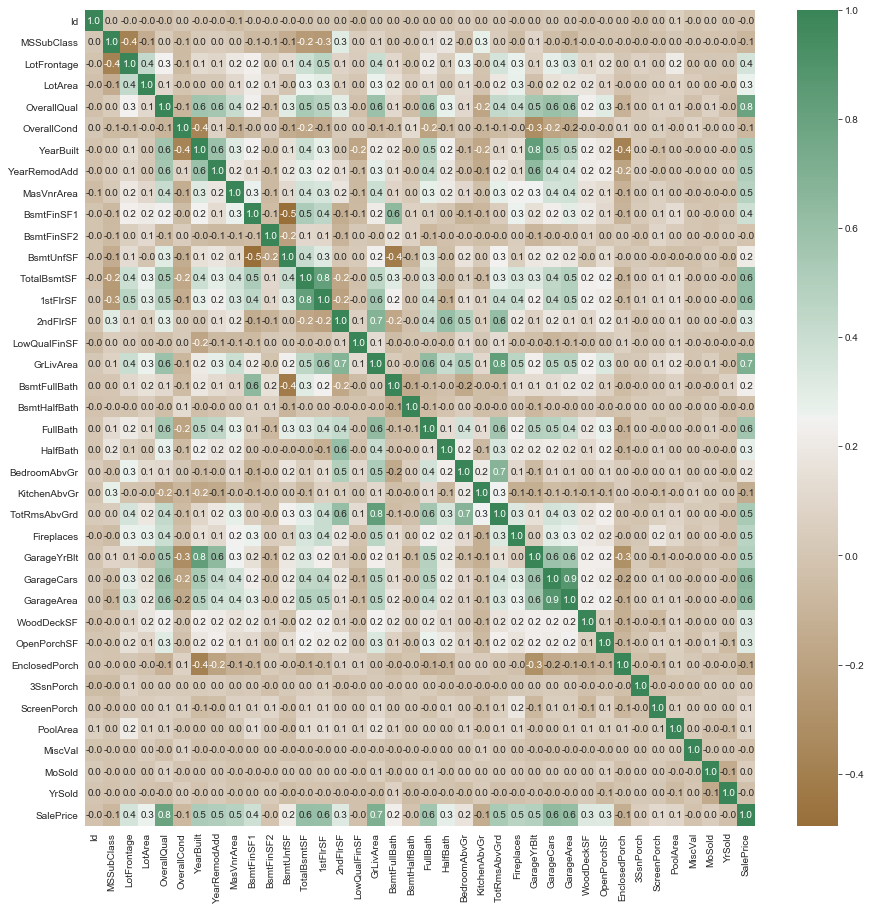

In [260]:
plt.rcParams['figure.figsize']= 15, 15
g = sns.heatmap(train.corr(),annot=True, fmt = ".1f", cmap=sns.diverging_palette(50, 500, n=500))

**(2.2). Normalisasi Distribusi Data**

c:\users\faith\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


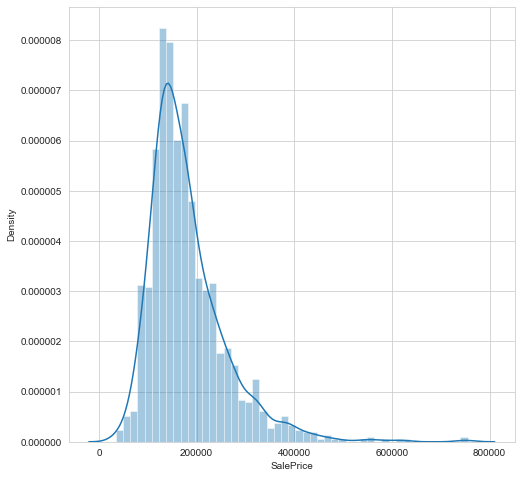

In [261]:
plt.rcParams['figure.figsize']= 8, 8
sns.distplot(train['SalePrice']);

c:\users\faith\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.20 and sigma = 79415.29



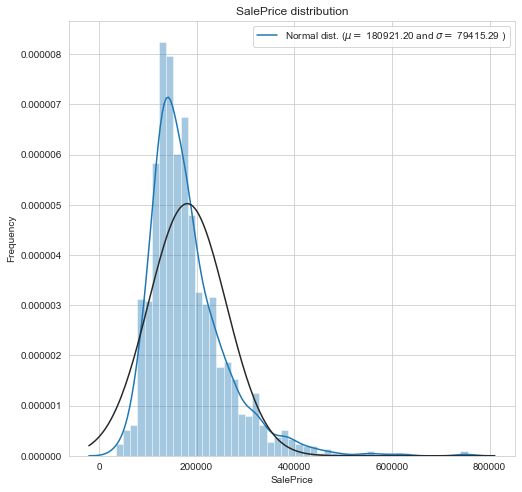

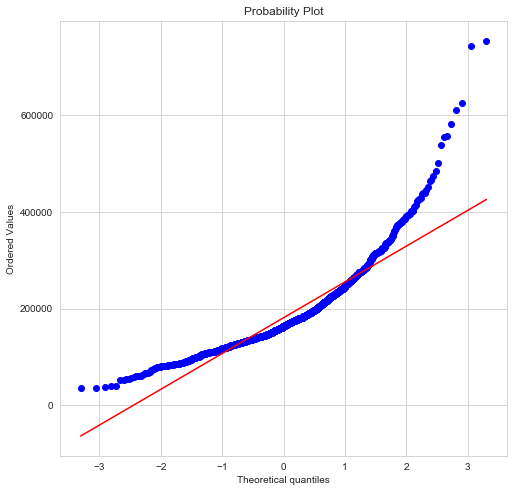

In [262]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# penjelasan hasil di bawah Variabel target miring ke kanan. Karena model (linier) menyukai data yang terdistribusi normal, kita perlu mengubah variabel ini dan membuatnya lebih terdistribusi normal.

c:\users\faith\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



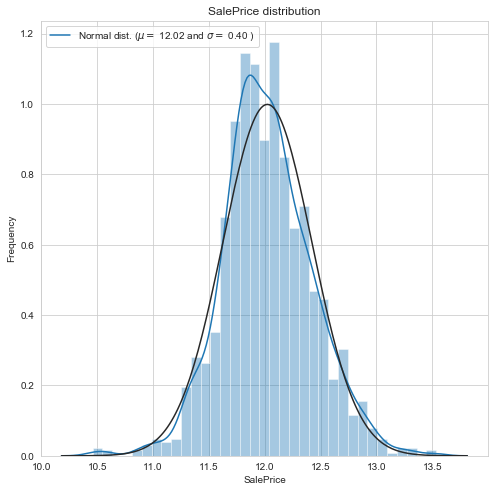

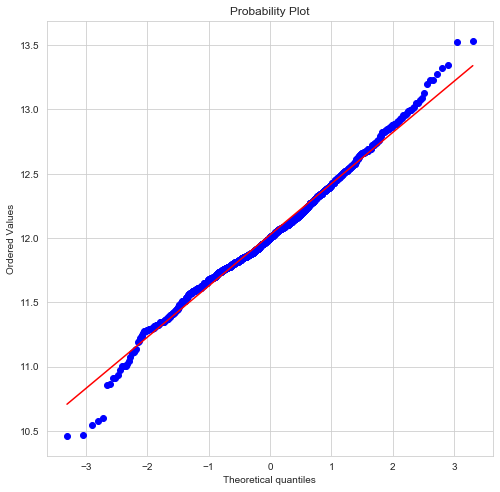

In [263]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#penjelasan hasil di bawah Kemiringan tersebut sekarang telah diperbaiki dan data tampak lebih terdistribusi secara normal.


**(3.3). Data cleaning**

**Missing Value**

In [264]:
dataset = pd.concat([train,test])

c:\users\faith\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [265]:
train_missing = train.isnull().sum()
train_missing = train_missing[train_missing>0]
train_missing.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

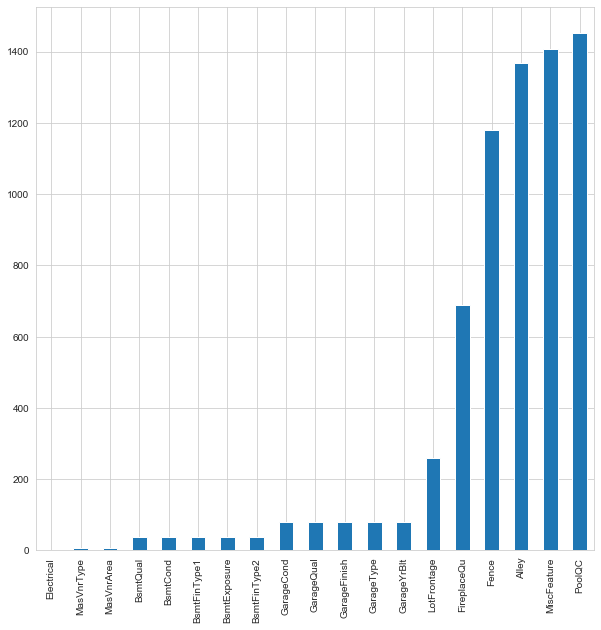

In [266]:
#missing value pada data training
plt.rcParams['figure.figsize']= 10, 10
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

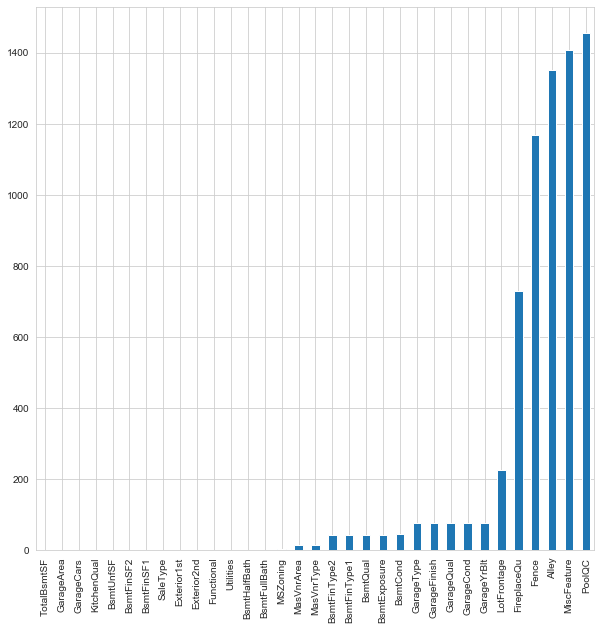

In [267]:
#missing value pada data testing
sns.set_style("whitegrid")
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

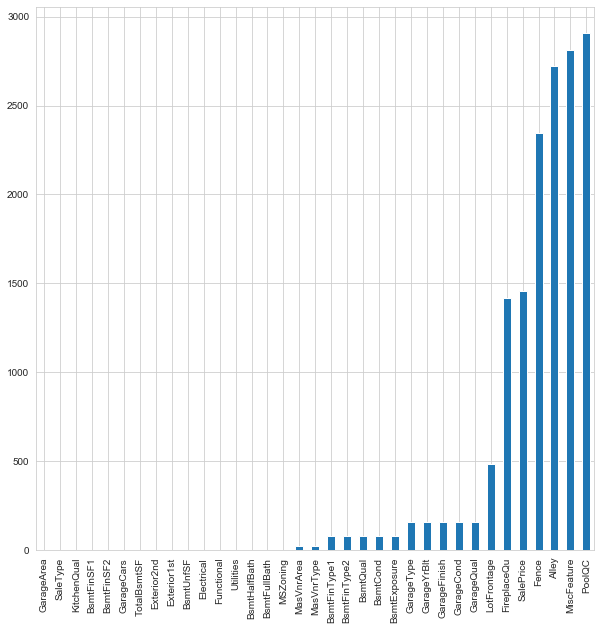

In [268]:
#missing value pada dataset (training + testing)
sns.set_style("whitegrid")
missing = dataset.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

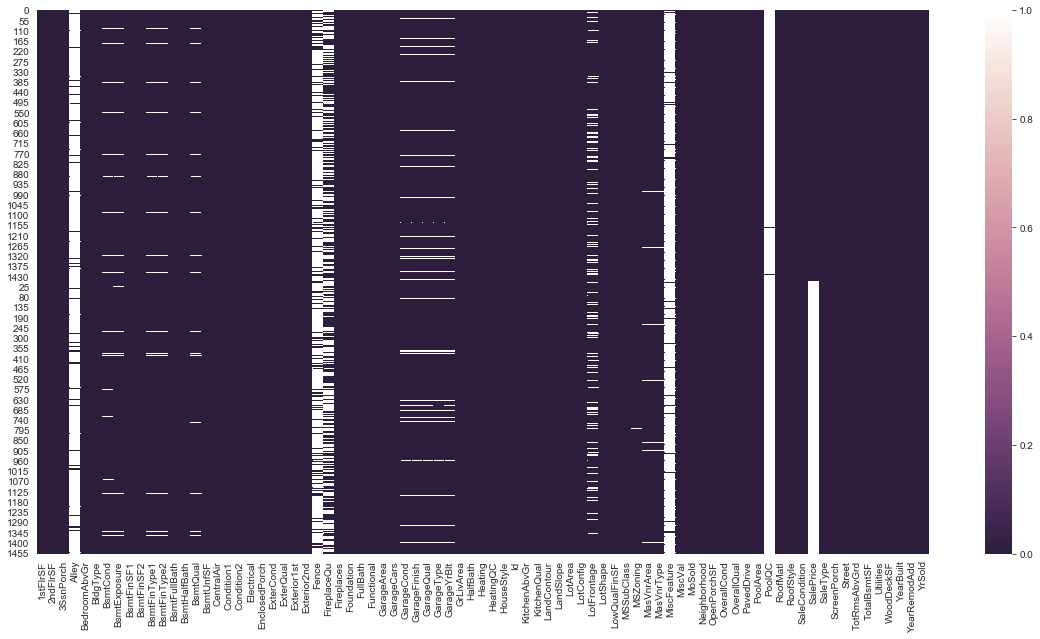

In [269]:
#detail missing value
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(dataset.isnull(), cmap=cmap)

In [270]:
dataset.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2814
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

**(Fix Problem Missing Value)**

In [271]:
dataset["PoolQC"] = dataset["PoolQC"].fillna("None")
dataset["MiscFeature"] = dataset["MiscFeature"].fillna("None")
dataset["Alley"] = dataset["Alley"].fillna("None")
dataset["Fence"] = dataset["Fence"].fillna("None")
dataset["FireplaceQu"] = dataset["FireplaceQu"].fillna("None")

dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    dataset[col] = dataset[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    dataset[col] = dataset[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dataset[col] = dataset[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dataset[col] = dataset[col].fillna('None')

dataset["MasVnrType"] = dataset["MasVnrType"].fillna("None")
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(0)
dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])
dataset = dataset.drop(['Utilities'], axis=1)
dataset["Functional"] = dataset["Functional"].fillna("Typ")
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])
dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])
dataset['MSSubClass'] = dataset['MSSubClass'].fillna("None")

In [272]:
dataset.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley               0
BedroomAbvGr        0
BldgType            0
BsmtCond            0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFinType1        0
BsmtFinType2        0
BsmtFullBath        0
BsmtHalfBath        0
BsmtQual            0
BsmtUnfSF           0
CentralAir          0
Condition1          0
Condition2          0
Electrical          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fence               0
FireplaceQu         0
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotFrontage         0
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            0
MasVnrArea          0
MasVnrType          0
MiscFeature         0
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive

**SalePrice merupakan class prediksi**

## 3. Data tranformation

**categorical Variabel**

In [284]:
dataset.shape

(2919, 80)

In [285]:
dataset.dtypes.value_counts()

int32      42
int64      26
float64    12
dtype: int64

In [286]:
mask = dataset.dtypes == np.object
categorical_cols = dataset.columns[mask]

In [287]:
num_ohc_cols = (dataset[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

#Tidak perlu menyandikan jika hanya ada satu nilai
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

small_num_ohc_cols -= 1
small_num_ohc_cols.sum()

0.0

**Label Encoder**

In [288]:
from sklearn.preprocessing import LabelEncoder

In [289]:
for c in small_num_ohc_cols.index:
    lbl = LabelEncoder() 
    lbl.fit(list(dataset[c].values)) 
    dataset[c] = lbl.transform(list(dataset[c].values))

# shape        
print('Shape all_data: {}'.format(dataset.shape))

Shape all_data: (2919, 80)


In [290]:
dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,0,4,3,706.0,0.0,...,12.247699,8,0,1,8,856.0,0,2003,2003,2008
1,1262,0,0,1,3,0,4,1,978.0,0.0,...,12.109016,8,0,1,6,1262.0,298,1976,1976,2007
2,920,866,0,1,3,0,4,2,486.0,0.0,...,12.317171,8,0,1,6,920.0,0,2001,2002,2008
3,961,756,0,1,3,0,1,3,216.0,0.0,...,11.849405,8,0,1,7,756.0,0,1915,1970,2006
4,1145,1053,0,1,4,0,4,0,655.0,0.0,...,12.429220,8,0,1,9,1145.0,192,2000,2000,2008


In [291]:
print('data training : ',train.shape)
print('data testing : ',test.shape)
print(train.SalePrice.shape)

data training :  (1460, 81)
data testing :  (1459, 80)
(1460,)


In [292]:
#data training
data=dataset.drop('Id', axis = 1)

data_train = data[:1460]
data_test = data[1460:]

X = data_train.drop('SalePrice', axis = 1)
y = data_train.SalePrice
X.shape

(1460, 78)

In [293]:
#data testing
X_test = data_test.drop('SalePrice', axis = 1)
X_test.shape

(1459, 78)

## 4. Modeling

In [294]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [239]:
kf = KFold(shuffle=True, random_state=1, n_splits=5)

**linier regression**

In [243]:
s = StandardScaler()
lr = LinearRegression()

estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

predictions = cross_val_predict(estimator, X, y, cv=kf)
acc_lr=r2_score(y, predictions)

In [244]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Regression Lasso**

In [245]:
estimator = Pipeline([("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])
predictions = cross_val_predict(estimator, X, y, cv = kf)
    
acc_lasso = r2_score(y, predictions)
acc_lasso

0.8133252985237489

In [246]:
##training Lasso
lasso.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso_regression',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

**Ridge Regression**

In [247]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridge= Pipeline([("scaler", scaler),("ridge_regression", RidgeCV(alphas=alphas))])
predictions = cross_val_predict(estimator, X, y, cv = kf)
    
acc_ridge = r2_score(y, predictions)
acc_ridge

0.8133252985237489

In [248]:
##training Lasso
ridgeCV.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge_regression',
                 RidgeCV(alphas=array([5.0e-03, 5.0e-02, 1.0e-01, 3.0e-01, 1.0e+00, 3.0e+00, 5.0e+00,
       1.0e+01, 1.5e+01, 3.0e+01, 8.0e+01]),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring=None,
                         store_cv_values=False))],
         verbose=False)

**model preformance**

In [250]:
results = pd.DataFrame({
    'Model':['Lr',
            'Lasso',
            'Ridge'],
    'Score':[acc_lr,
             acc_lasso,
            acc_ridge]})

sorted_result = results.sort_values(by='Score', ascending=True).reset_index(drop=True)
sorted_result

,Model,Score
0,Lasso,0.813325
1,Ridge,0.813325
2,Lr,0.843995


**Predict**

In [255]:
# Predict every model
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridgeCV.predict(X_test)

In [256]:
sub = pd.DataFrame()
sub['Id'] = test.Id
sub['SalePrice'] = acc_lr
sub.to_csv('submission.csv',index=False)